In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [7]:
df = pd.read_csv("mon_fichier.csv")
df.head()


,Age,Gender,Hx Radiothreapy,Focality,Risk,T,N,M,Stage,Response,Recurred,Adenopathy_Extensive,Adenopathy_Left,Adenopathy_No,Adenopathy_Posterior,Adenopathy_Right,Pathology_Follicular,Pathology_Hurthel cell,Pathology_Micropapillary,Pathology_Papillary
0,27,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,34,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
2,30,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
3,62,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
4,62,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0


In [8]:
X = df.drop('Recurred', axis=1)
y = df['Recurred']


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [11]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.961038961038961
Confusion Matrix:
 [[58  0]
 [ 3 16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        58
           1       1.00      0.84      0.91        19

    accuracy                           0.96        77
   macro avg       0.98      0.92      0.94        77
weighted avg       0.96      0.96      0.96        77



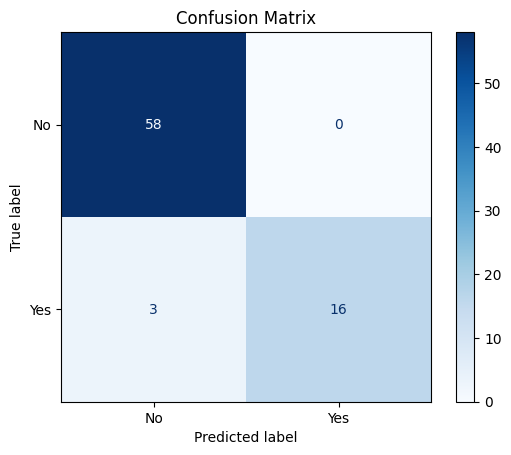

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    model, X_test, y_test, 
    display_labels=["No", "Yes"],
    cmap=plt.cm.Blues,
    values_format="d"
)
plt.title("Confusion Matrix")
plt.show()


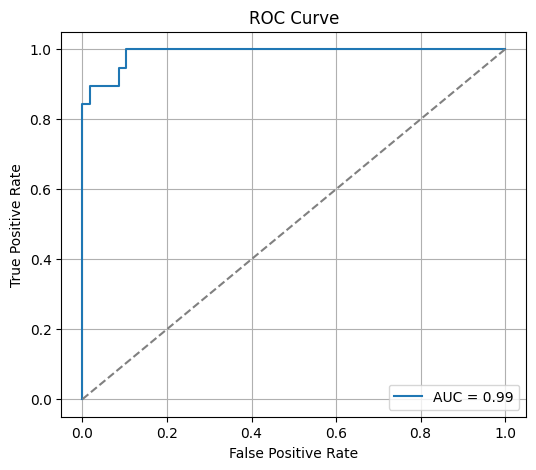

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score

y_proba = model.predict_proba(X_test)[:,1]  # Proba d'appartenir à classe 1
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


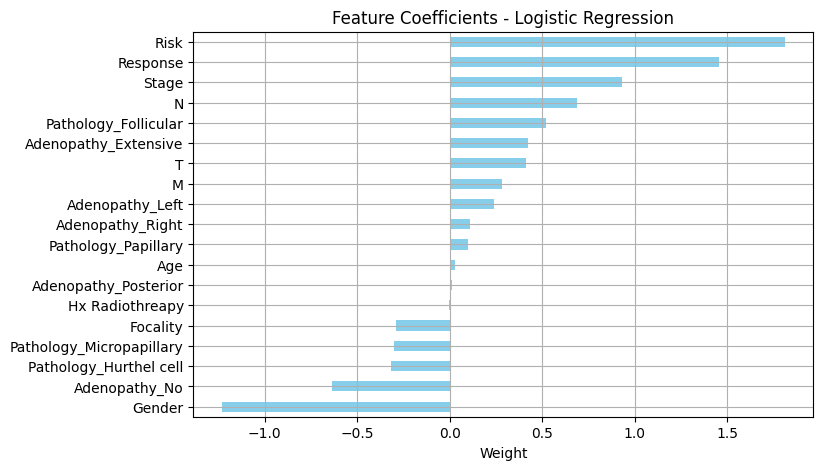

In [14]:
coeffs = pd.Series(model.coef_[0], index=X.columns)
coeffs.sort_values().plot(kind='barh', figsize=(8,5), color='skyblue')
plt.title("Feature Coefficients - Logistic Regression")
plt.xlabel("Weight")
plt.grid(True)
plt.show()
